In [1]:
%pylab inline
import cv2 as cv
import numpy as np
import argparse

Populating the interactive namespace from numpy and matplotlib


In [2]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets 

In [3]:
from structure_tensor import calcGST, ApplyDenoisingAndStructureTensor

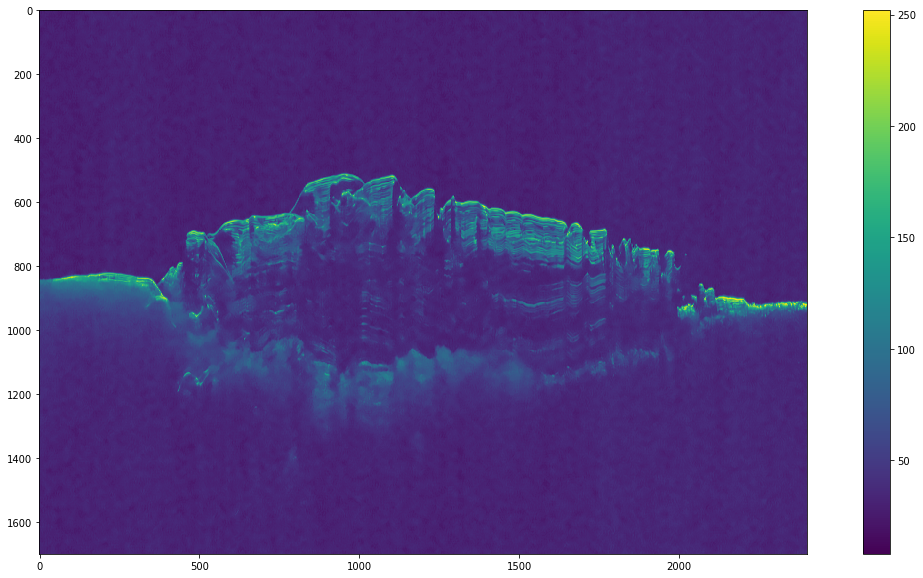

In [4]:
imgInTiny, imgCoherency, ori, imgCoherencyBin, ori_bin, imgBin, imgBinClear = ApplyDenoisingAndStructureTensor("sharad_data/s_00429402_thm.jpg")

figure(figsize=(20,10))

imshow(imgInTiny)
colorbar()

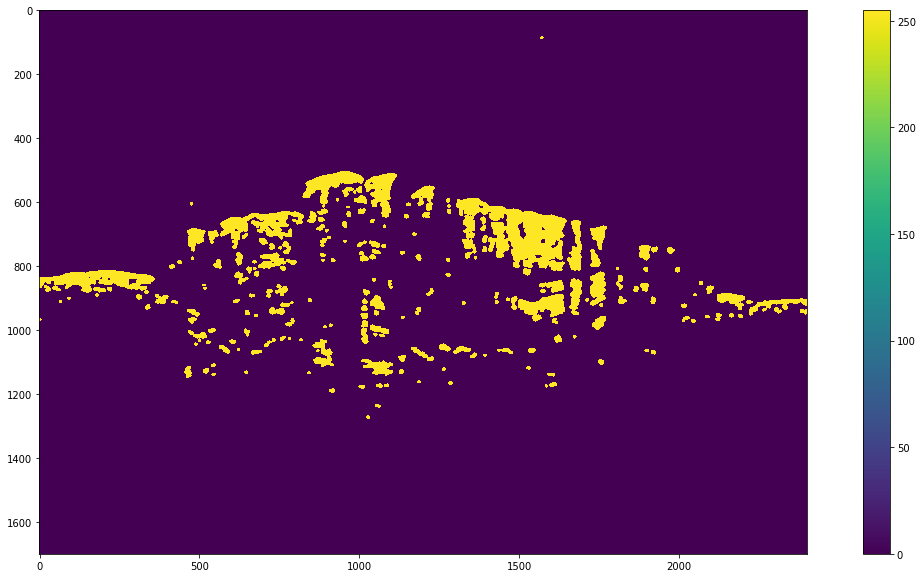

In [5]:
figure(figsize=(20,10))

imshow(imgBinClear)
colorbar()

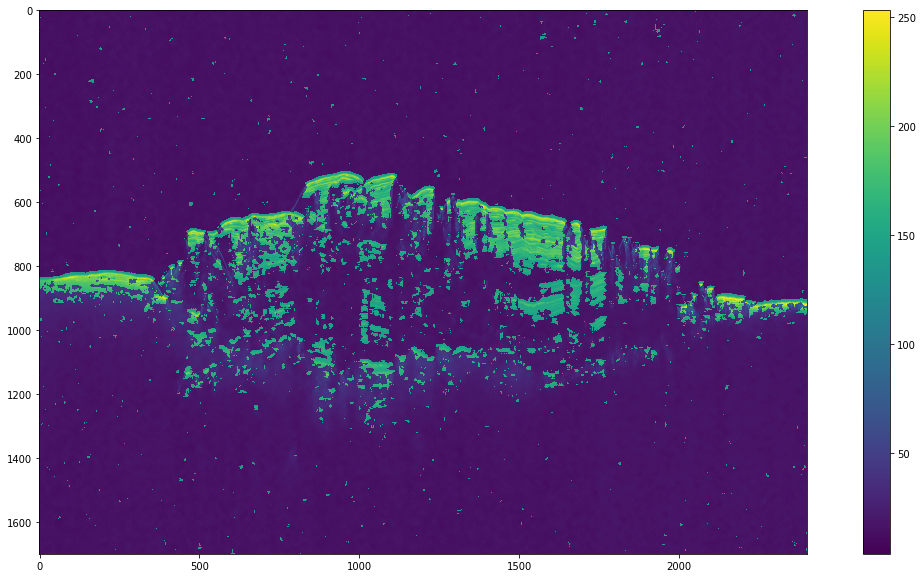

In [6]:
#res = np.uint8(0.5*(imgIn + imgBin))
resTiny = np.uint8(0.5*(imgInTiny + imgBin))
Edges = cv.Canny(imgInTiny,50,100) #2nd,3rd: lower and upper threshold

figure(figsize=(20,10))

imshow(resTiny)
colorbar()

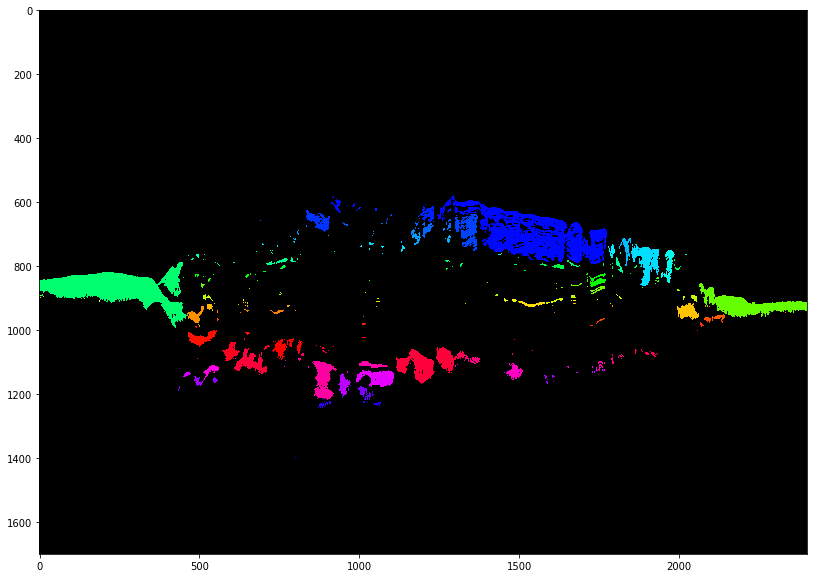

In [7]:
from ConnectedComp import imshow_components

figure(figsize=(20,10))
a = imshow_components(imgInTiny)
imshow(a)

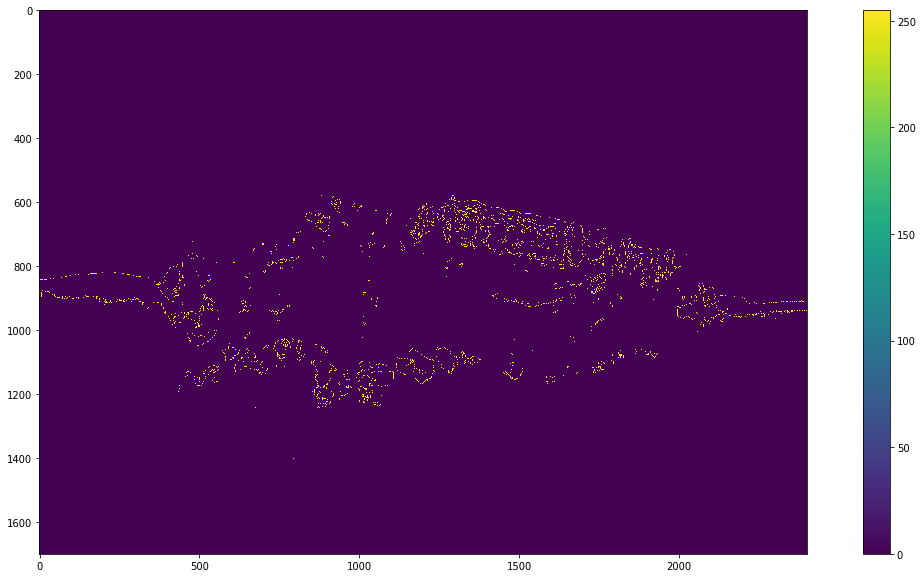

In [8]:
cannylab = cv.Canny(a,50,100)
figure(figsize=(20,10))
imshow(cannylab)
colorbar()

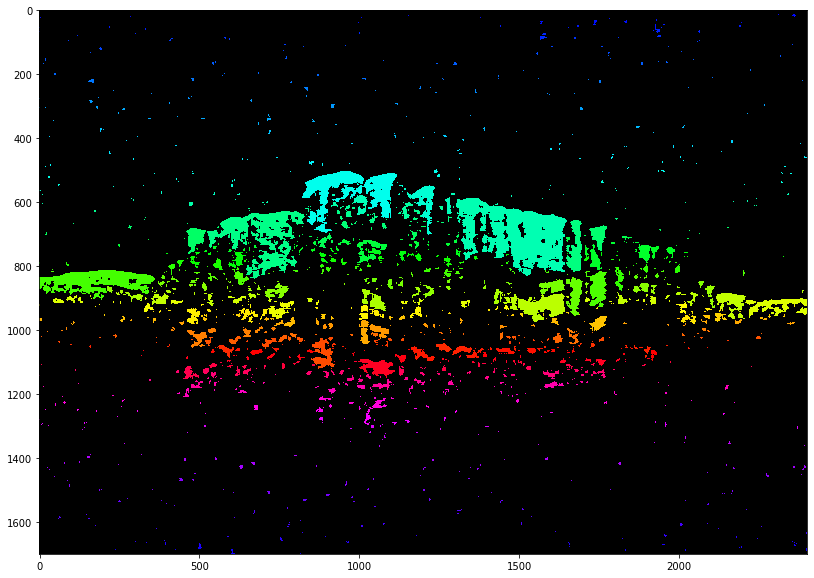

In [9]:
from ConnectedComp import connected_components_for_binaryimg

ori_conncomp = connected_components_for_binaryimg(ori_bin)    

figure(figsize=(20,10))
imshow(ori_conncomp)

# Selection of bigger components

In [10]:
#selection of connected components with pixel area > certain value (valuemean)

from ConnectedComp import selection

index, areas, arearray = selection(imgInTiny)

Total number of connected components: 490
Average area of connected components: 8326.530612244898
Labels of connected components with pixel area higher than average: [0, 1, 3, 131, 198]
Number of pixels of each selected area: [3862598, 47344, 44073, 34923, 13037]

[[      0 3862598]
 [      1   47344]
 [      3   44073]
 [    131   34923]
 [    198   13037]]


New label for 0 component: 0
New label for 1 component: 51
New label for 3 component: 102
New label for 131 component: 153
New label for 198 component: 204


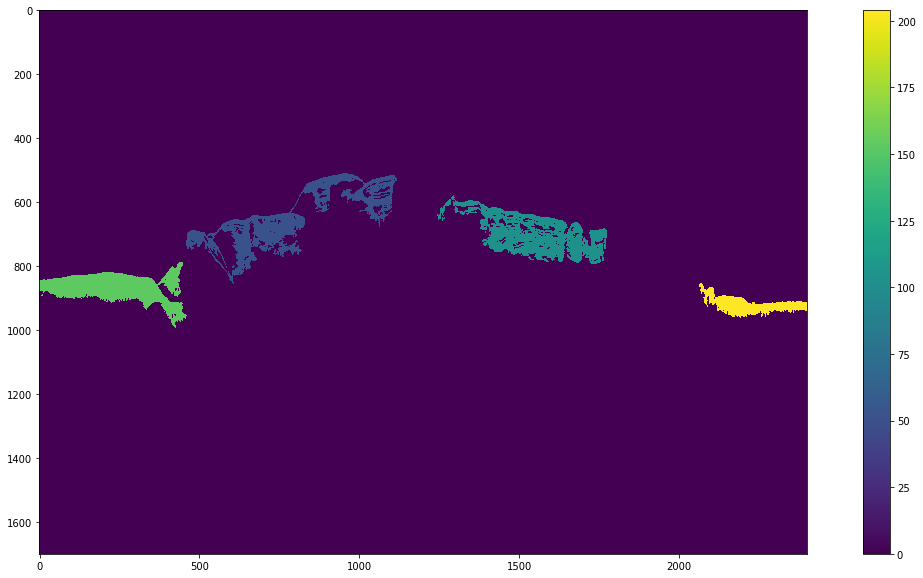

In [11]:
#new array image with only the components having area[pixel]> average area of all components
from ConnectedComp import newimgbigcomponents

newimg, huenewimg = newimgbigcomponents(imgInTiny,index)

figure(figsize=(20,10))
imshow(newimg)
colorbar()

#imsave('conncomp_selection.png',newimg,vmin=newimg.min(), vmax=newimg.max())

In [12]:
import imageio
newimg_uint8 = np.uint8(179*newimg/np.max(newimg))
imageio.imwrite('conncomp_selection.png', newimg_uint8)

print(newimg_uint8.dtype)

uint8


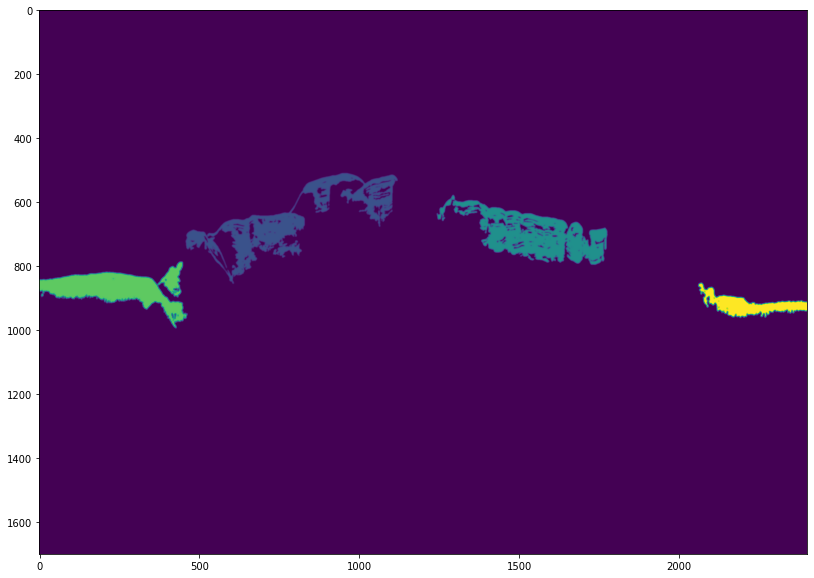

In [13]:
#with edges
figure(figsize=(20,10))
imshow(newimg,interpolation='bicubic')
#imshow(newimg,interpolation='spline16')
#imshow(newimg,interpolation='spline36')

In [14]:
indexoribin, areasoribin, arrayoribin = selection(ori_bin)

Total number of connected components: 2132
Average area of connected components: 1913.6960600375235
Labels of connected components with pixel area higher than average: [0, 387, 390, 426, 467, 524, 546, 571, 581, 637, 815, 829, 866, 881, 960, 981, 995, 1034, 1056, 1328, 1484]
Number of pixels of each selected area: [3802133, 11633, 9649, 4358, 46439, 24758, 4909, 2384, 2935, 2506, 17610, 4600, 3541, 2280, 2405, 8808, 3861, 4935, 1997, 3609, 3524]

[[      0 3802133]
 [    387   11633]
 [    390    9649]
 [    426    4358]
 [    467   46439]
 [    524   24758]
 [    546    4909]
 [    571    2384]
 [    581    2935]
 [    637    2506]
 [    815   17610]
 [    829    4600]
 [    866    3541]
 [    881    2280]
 [    960    2405]
 [    981    8808]
 [    995    3861]
 [   1034    4935]
 [   1056    1997]
 [   1328    3609]
 [   1484    3524]]


New label for 0 component: 0
New label for 387 component: 12
New label for 390 component: 24
New label for 426 component: 36
New label for 467 component: 48
New label for 524 component: 60
New label for 546 component: 72
New label for 571 component: 84
New label for 581 component: 96
New label for 637 component: 108
New label for 815 component: 120
New label for 829 component: 132
New label for 866 component: 144
New label for 881 component: 156
New label for 960 component: 168
New label for 981 component: 180
New label for 995 component: 192
New label for 1034 component: 204
New label for 1056 component: 216
New label for 1328 component: 228
New label for 1484 component: 240


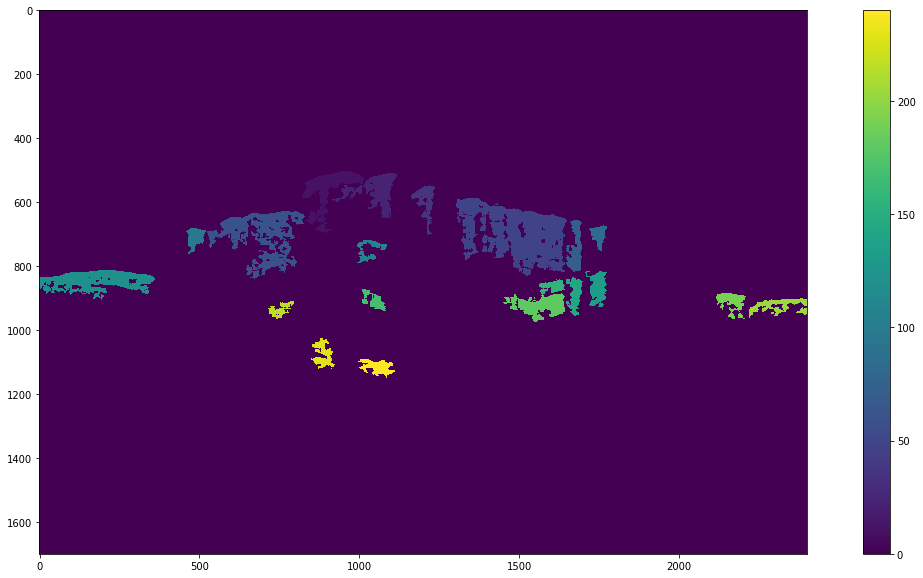

In [15]:
figure(figsize=(20,10))
imshow(newimgbigcomponents(ori_bin,indexoribin)[0])
colorbar()

# Interactive

In [16]:
def threshold(img, thr):
    img = cv.threshold(img, thr, 255, cv.THRESH_BINARY)[1]
    figure(figsize=(20,10))
    imshow(img)

interact(threshold, img=fixed(imgInTiny), thr=(0,255))

interactive(children=(IntSlider(value=127, description='thr', max=255), Output()), _dom_classes=('widget-inter…

<function __main__.threshold(img, thr)>

In [17]:
def connected_components(img, thr):
    img = cv.threshold(img, thr, 255, cv.THRESH_BINARY)[1]  # ensure binary
    num_labels, labels = cv.connectedComponents(img)
    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    #print (blank_ch)
    labeled_img = cv.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv.cvtColor(labeled_img, cv.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0
    figure(figsize=(20,10))
    imshow(labeled_img)

interact(connected_components, img=fixed(imgInTiny), thr=(0,255))

interactive(children=(IntSlider(value=127, description='thr', max=255), Output()), _dom_classes=('widget-inter…

<function __main__.connected_components(img, thr)>

# Finding edges

In [18]:
#finding upper edge 
from ConnectedComp import FindingUpperEdges

edges, upperlimitx, upperlimity = FindingUpperEdges(newimg, huenewimg)

column 0 upper edge at: 843 , with label: 153
column 1 upper edge at: 843 , with label: 153
column 2 upper edge at: 843 , with label: 153
column 3 upper edge at: 843 , with label: 153
column 4 upper edge at: 843 , with label: 153
column 5 upper edge at: 842 , with label: 153
column 6 upper edge at: 843 , with label: 153
column 7 upper edge at: 843 , with label: 153
column 8 upper edge at: 843 , with label: 153
column 9 upper edge at: 843 , with label: 153
column 10 upper edge at: 843 , with label: 153
column 11 upper edge at: 842 , with label: 153
column 12 upper edge at: 842 , with label: 153
column 13 upper edge at: 842 , with label: 153
column 14 upper edge at: 842 , with label: 153
column 15 upper edge at: 842 , with label: 153
column 16 upper edge at: 842 , with label: 153
column 17 upper edge at: 842 , with label: 153
column 18 upper edge at: 843 , with label: 153
column 19 upper edge at: 843 , with label: 153
column 20 upper edge at: 843 , with label: 153
column 21 upper edge at

column 255 upper edge at: 822 , with label: 153
column 256 upper edge at: 823 , with label: 153
column 257 upper edge at: 823 , with label: 153
column 258 upper edge at: 823 , with label: 153
column 259 upper edge at: 823 , with label: 153
column 260 upper edge at: 823 , with label: 153
column 261 upper edge at: 824 , with label: 153
column 262 upper edge at: 824 , with label: 153
column 263 upper edge at: 824 , with label: 153
column 264 upper edge at: 824 , with label: 153
column 265 upper edge at: 824 , with label: 153
column 266 upper edge at: 825 , with label: 153
column 267 upper edge at: 825 , with label: 153
column 268 upper edge at: 825 , with label: 153
column 269 upper edge at: 825 , with label: 153
column 270 upper edge at: 825 , with label: 153
column 271 upper edge at: 826 , with label: 153
column 272 upper edge at: 826 , with label: 153
column 273 upper edge at: 826 , with label: 153
column 274 upper edge at: 826 , with label: 153
column 275 upper edge at: 826 , with lab

column 463 upper edge at: 698 , with label: 51
column 464 upper edge at: 697 , with label: 51
column 465 upper edge at: 696 , with label: 51
column 466 upper edge at: 695 , with label: 51
column 467 upper edge at: 694 , with label: 51
column 468 upper edge at: 694 , with label: 51
column 469 upper edge at: 693 , with label: 51
column 470 upper edge at: 692 , with label: 51
column 471 upper edge at: 692 , with label: 51
column 472 upper edge at: 691 , with label: 51
column 473 upper edge at: 691 , with label: 51
column 474 upper edge at: 690 , with label: 51
column 475 upper edge at: 690 , with label: 51
column 476 upper edge at: 689 , with label: 51
column 477 upper edge at: 689 , with label: 51
column 478 upper edge at: 688 , with label: 51
column 479 upper edge at: 688 , with label: 51
column 480 upper edge at: 688 , with label: 51
column 481 upper edge at: 687 , with label: 51
column 482 upper edge at: 687 , with label: 51
column 483 upper edge at: 687 , with label: 51
column 484 up

column 762 upper edge at: 634 , with label: 51
column 763 upper edge at: 634 , with label: 51
column 764 upper edge at: 634 , with label: 51
column 765 upper edge at: 634 , with label: 51
column 766 upper edge at: 633 , with label: 51
column 767 upper edge at: 634 , with label: 51
column 768 upper edge at: 633 , with label: 51
column 769 upper edge at: 633 , with label: 51
column 770 upper edge at: 633 , with label: 51
column 771 upper edge at: 634 , with label: 51
column 772 upper edge at: 634 , with label: 51
column 773 upper edge at: 634 , with label: 51
column 774 upper edge at: 634 , with label: 51
column 775 upper edge at: 634 , with label: 51
column 776 upper edge at: 634 , with label: 51
column 777 upper edge at: 634 , with label: 51
column 778 upper edge at: 634 , with label: 51
column 779 upper edge at: 634 , with label: 51
column 780 upper edge at: 634 , with label: 51
column 781 upper edge at: 633 , with label: 51
column 782 upper edge at: 632 , with label: 51
column 783 up

column 997 upper edge at: 521 , with label: 51
column 998 upper edge at: 522 , with label: 51
column 999 upper edge at: 523 , with label: 51
column 1000 upper edge at: 524 , with label: 51
column 1001 upper edge at: 524 , with label: 51
column 1002 upper edge at: 525 , with label: 51
column 1003 upper edge at: 526 , with label: 51
column 1004 upper edge at: 527 , with label: 51
column 1005 upper edge at: 527 , with label: 51
column 1006 upper edge at: 528 , with label: 51
column 1007 upper edge at: 529 , with label: 51
column 1008 upper edge at: 530 , with label: 51
column 1009 upper edge at: 531 , with label: 51
column 1010 upper edge at: 532 , with label: 51
column 1011 upper edge at: 533 , with label: 51
column 1012 upper edge at: 534 , with label: 51
column 1013 upper edge at: 536 , with label: 51
column 1014 upper edge at: 537 , with label: 51
column 1015 upper edge at: 539 , with label: 51
column 1016 upper edge at: 540 , with label: 51
column 1017 upper edge at: 541 , with label

column 1362 upper edge at: 596 , with label: 102
column 1363 upper edge at: 596 , with label: 102
column 1364 upper edge at: 596 , with label: 102
column 1365 upper edge at: 596 , with label: 102
column 1366 upper edge at: 596 , with label: 102
column 1367 upper edge at: 596 , with label: 102
column 1368 upper edge at: 596 , with label: 102
column 1369 upper edge at: 596 , with label: 102
column 1370 upper edge at: 597 , with label: 102
column 1371 upper edge at: 597 , with label: 102
column 1372 upper edge at: 598 , with label: 102
column 1373 upper edge at: 598 , with label: 102
column 1374 upper edge at: 599 , with label: 102
column 1375 upper edge at: 600 , with label: 102
column 1376 upper edge at: 601 , with label: 102
column 1377 upper edge at: 602 , with label: 102
column 1378 upper edge at: 603 , with label: 102
column 1379 upper edge at: 604 , with label: 102
column 1380 upper edge at: 604 , with label: 102
column 1381 upper edge at: 604 , with label: 102
column 1382 upper ed

column 1648 upper edge at: 669 , with label: 102
column 1649 upper edge at: 671 , with label: 102
column 1650 upper edge at: 674 , with label: 102
column 1651 upper edge at: 677 , with label: 102
column 1652 upper edge at: 691 , with label: 102
column 1653 upper edge at: 690 , with label: 102
column 1654 upper edge at: 685 , with label: 102
column 1655 upper edge at: 685 , with label: 102
column 1656 upper edge at: 682 , with label: 102
column 1657 upper edge at: 680 , with label: 102
column 1658 upper edge at: 678 , with label: 102
column 1659 upper edge at: 676 , with label: 102
column 1660 upper edge at: 675 , with label: 102
column 1661 upper edge at: 672 , with label: 102
column 1662 upper edge at: 670 , with label: 102
column 1663 upper edge at: 669 , with label: 102
column 1664 upper edge at: 668 , with label: 102
column 1665 upper edge at: 667 , with label: 102
column 1666 upper edge at: 667 , with label: 102
column 1667 upper edge at: 666 , with label: 102
column 1668 upper ed

column 2110 upper edge at: 888 , with label: 204
column 2111 upper edge at: 892 , with label: 204
column 2112 upper edge at: 893 , with label: 204
column 2113 upper edge at: 894 , with label: 204
column 2114 upper edge at: 896 , with label: 204
column 2115 upper edge at: 897 , with label: 204
column 2116 upper edge at: 898 , with label: 204
column 2117 upper edge at: 898 , with label: 204
column 2118 upper edge at: 898 , with label: 204
column 2119 upper edge at: 897 , with label: 204
column 2120 upper edge at: 897 , with label: 204
column 2121 upper edge at: 896 , with label: 204
column 2122 upper edge at: 895 , with label: 204
column 2123 upper edge at: 895 , with label: 204
column 2124 upper edge at: 894 , with label: 204
column 2125 upper edge at: 894 , with label: 204
column 2126 upper edge at: 893 , with label: 204
column 2127 upper edge at: 893 , with label: 204
column 2128 upper edge at: 893 , with label: 204
column 2129 upper edge at: 893 , with label: 204
column 2130 upper ed

In [19]:
#finding lower edge 
from ConnectedComp import FindingLowerEdges
            
edges, lowerlimitx, lowerlimity = FindingLowerEdges(newimg, huenewimg, edges)

column 0 lower edge at: 826 (not reversed value), right reversed value: 874 , with label: 153
column 1 lower edge at: 823 (not reversed value), right reversed value: 877 , with label: 153
column 2 lower edge at: 821 (not reversed value), right reversed value: 879 , with label: 153
column 3 lower edge at: 821 (not reversed value), right reversed value: 879 , with label: 153
column 4 lower edge at: 821 (not reversed value), right reversed value: 879 , with label: 153
column 5 lower edge at: 822 (not reversed value), right reversed value: 878 , with label: 153
column 6 lower edge at: 822 (not reversed value), right reversed value: 878 , with label: 153
column 7 lower edge at: 807 (not reversed value), right reversed value: 893 , with label: 153
column 8 lower edge at: 803 (not reversed value), right reversed value: 897 , with label: 153
column 9 lower edge at: 806 (not reversed value), right reversed value: 894 , with label: 153
column 10 lower edge at: 807 (not reversed value), right rev

column 162 lower edge at: 804 (not reversed value), right reversed value: 896 , with label: 153
column 163 lower edge at: 804 (not reversed value), right reversed value: 896 , with label: 153
column 164 lower edge at: 806 (not reversed value), right reversed value: 894 , with label: 153
column 165 lower edge at: 803 (not reversed value), right reversed value: 897 , with label: 153
column 166 lower edge at: 802 (not reversed value), right reversed value: 898 , with label: 153
column 167 lower edge at: 802 (not reversed value), right reversed value: 898 , with label: 153
column 168 lower edge at: 803 (not reversed value), right reversed value: 897 , with label: 153
column 169 lower edge at: 804 (not reversed value), right reversed value: 896 , with label: 153
column 170 lower edge at: 805 (not reversed value), right reversed value: 895 , with label: 153
column 171 lower edge at: 806 (not reversed value), right reversed value: 894 , with label: 153
column 172 lower edge at: 805 (not rever

column 248 lower edge at: 794 (not reversed value), right reversed value: 906 , with label: 153
column 249 lower edge at: 792 (not reversed value), right reversed value: 908 , with label: 153
column 250 lower edge at: 790 (not reversed value), right reversed value: 910 , with label: 153
column 251 lower edge at: 789 (not reversed value), right reversed value: 911 , with label: 153
column 252 lower edge at: 795 (not reversed value), right reversed value: 905 , with label: 153
column 253 lower edge at: 794 (not reversed value), right reversed value: 906 , with label: 153
column 254 lower edge at: 793 (not reversed value), right reversed value: 907 , with label: 153
column 255 lower edge at: 791 (not reversed value), right reversed value: 909 , with label: 153
column 256 lower edge at: 790 (not reversed value), right reversed value: 910 , with label: 153
column 257 lower edge at: 792 (not reversed value), right reversed value: 908 , with label: 153
column 258 lower edge at: 790 (not rever

column 409 lower edge at: 729 (not reversed value), right reversed value: 971 , with label: 153
column 410 lower edge at: 730 (not reversed value), right reversed value: 970 , with label: 153
column 411 lower edge at: 729 (not reversed value), right reversed value: 971 , with label: 153
column 412 lower edge at: 725 (not reversed value), right reversed value: 975 , with label: 153
column 413 lower edge at: 726 (not reversed value), right reversed value: 974 , with label: 153
column 414 lower edge at: 721 (not reversed value), right reversed value: 979 , with label: 153
column 415 lower edge at: 721 (not reversed value), right reversed value: 979 , with label: 153
column 416 lower edge at: 719 (not reversed value), right reversed value: 981 , with label: 153
column 417 lower edge at: 717 (not reversed value), right reversed value: 983 , with label: 153
column 418 lower edge at: 716 (not reversed value), right reversed value: 984 , with label: 153
column 419 lower edge at: 714 (not rever

column 492 lower edge at: 971 (not reversed value), right reversed value: 729 , with label: 51
column 493 lower edge at: 961 (not reversed value), right reversed value: 739 , with label: 51
column 494 lower edge at: 959 (not reversed value), right reversed value: 741 , with label: 51
column 495 lower edge at: 959 (not reversed value), right reversed value: 741 , with label: 51
column 496 lower edge at: 958 (not reversed value), right reversed value: 742 , with label: 51
column 497 lower edge at: 958 (not reversed value), right reversed value: 742 , with label: 51
column 498 lower edge at: 958 (not reversed value), right reversed value: 742 , with label: 51
column 499 lower edge at: 956 (not reversed value), right reversed value: 744 , with label: 51
column 500 lower edge at: 957 (not reversed value), right reversed value: 743 , with label: 51
column 501 lower edge at: 960 (not reversed value), right reversed value: 740 , with label: 51
column 502 lower edge at: 962 (not reversed value)

column 645 lower edge at: 890 (not reversed value), right reversed value: 810 , with label: 51
column 646 lower edge at: 888 (not reversed value), right reversed value: 812 , with label: 51
column 647 lower edge at: 888 (not reversed value), right reversed value: 812 , with label: 51
column 648 lower edge at: 889 (not reversed value), right reversed value: 811 , with label: 51
column 649 lower edge at: 889 (not reversed value), right reversed value: 811 , with label: 51
column 650 lower edge at: 890 (not reversed value), right reversed value: 810 , with label: 51
column 651 lower edge at: 891 (not reversed value), right reversed value: 809 , with label: 51
column 652 lower edge at: 891 (not reversed value), right reversed value: 809 , with label: 51
column 653 lower edge at: 891 (not reversed value), right reversed value: 809 , with label: 51
column 654 lower edge at: 892 (not reversed value), right reversed value: 808 , with label: 51
column 655 lower edge at: 892 (not reversed value)

column 794 lower edge at: 933 (not reversed value), right reversed value: 767 , with label: 51
column 795 lower edge at: 933 (not reversed value), right reversed value: 767 , with label: 51
column 796 lower edge at: 945 (not reversed value), right reversed value: 755 , with label: 51
column 797 lower edge at: 944 (not reversed value), right reversed value: 756 , with label: 51
column 798 lower edge at: 944 (not reversed value), right reversed value: 756 , with label: 51
column 799 lower edge at: 945 (not reversed value), right reversed value: 755 , with label: 51
column 800 lower edge at: 943 (not reversed value), right reversed value: 757 , with label: 51
column 801 lower edge at: 943 (not reversed value), right reversed value: 757 , with label: 51
column 802 lower edge at: 944 (not reversed value), right reversed value: 756 , with label: 51
column 803 lower edge at: 943 (not reversed value), right reversed value: 757 , with label: 51
column 804 lower edge at: 946 (not reversed value)

column 951 lower edge at: 1117 (not reversed value), right reversed value: 583 , with label: 51
column 952 lower edge at: 1118 (not reversed value), right reversed value: 582 , with label: 51
column 953 lower edge at: 1119 (not reversed value), right reversed value: 581 , with label: 51
column 954 lower edge at: 1119 (not reversed value), right reversed value: 581 , with label: 51
column 955 lower edge at: 1119 (not reversed value), right reversed value: 581 , with label: 51
column 956 lower edge at: 1119 (not reversed value), right reversed value: 581 , with label: 51
column 957 lower edge at: 1119 (not reversed value), right reversed value: 581 , with label: 51
column 958 lower edge at: 1119 (not reversed value), right reversed value: 581 , with label: 51
column 959 lower edge at: 1119 (not reversed value), right reversed value: 581 , with label: 51
column 960 lower edge at: 1118 (not reversed value), right reversed value: 582 , with label: 51
column 961 lower edge at: 1117 (not reve

column 1113 lower edge at: 1167 (not reversed value), right reversed value: 533 , with label: 51
column 1114 lower edge at: 1167 (not reversed value), right reversed value: 533 , with label: 51
column 1115 lower edge at: 1167 (not reversed value), right reversed value: 533 , with label: 51
column 1116 lower edge at: 1167 (not reversed value), right reversed value: 533 , with label: 51
column 1117 lower edge at: 1166 (not reversed value), right reversed value: 534 , with label: 51
column 1118 lower edge at: 1166 (not reversed value), right reversed value: 534 , with label: 51
column 1119 lower edge at: 1166 (not reversed value), right reversed value: 534 , with label: 51
column 1244 lower edge at: 1060 (not reversed value), right reversed value: 640 , with label: 102
column 1245 lower edge at: 1056 (not reversed value), right reversed value: 644 , with label: 102
column 1246 lower edge at: 1049 (not reversed value), right reversed value: 651 , with label: 102
column 1247 lower edge at: 

column 1321 lower edge at: 1061 (not reversed value), right reversed value: 639 , with label: 102
column 1322 lower edge at: 1061 (not reversed value), right reversed value: 639 , with label: 102
column 1323 lower edge at: 1060 (not reversed value), right reversed value: 640 , with label: 102
column 1324 lower edge at: 1059 (not reversed value), right reversed value: 641 , with label: 102
column 1325 lower edge at: 1059 (not reversed value), right reversed value: 641 , with label: 102
column 1326 lower edge at: 1058 (not reversed value), right reversed value: 642 , with label: 102
column 1327 lower edge at: 1057 (not reversed value), right reversed value: 643 , with label: 102
column 1328 lower edge at: 1057 (not reversed value), right reversed value: 643 , with label: 102
column 1329 lower edge at: 1061 (not reversed value), right reversed value: 639 , with label: 102
column 1330 lower edge at: 1061 (not reversed value), right reversed value: 639 , with label: 102
column 1331 lower ed

column 1471 lower edge at: 946 (not reversed value), right reversed value: 754 , with label: 102
column 1472 lower edge at: 944 (not reversed value), right reversed value: 756 , with label: 102
column 1473 lower edge at: 943 (not reversed value), right reversed value: 757 , with label: 102
column 1474 lower edge at: 942 (not reversed value), right reversed value: 758 , with label: 102
column 1475 lower edge at: 941 (not reversed value), right reversed value: 759 , with label: 102
column 1476 lower edge at: 939 (not reversed value), right reversed value: 761 , with label: 102
column 1477 lower edge at: 938 (not reversed value), right reversed value: 762 , with label: 102
column 1478 lower edge at: 937 (not reversed value), right reversed value: 763 , with label: 102
column 1479 lower edge at: 936 (not reversed value), right reversed value: 764 , with label: 102
column 1480 lower edge at: 936 (not reversed value), right reversed value: 764 , with label: 102
column 1481 lower edge at: 936

column 1627 lower edge at: 912 (not reversed value), right reversed value: 788 , with label: 102
column 1628 lower edge at: 912 (not reversed value), right reversed value: 788 , with label: 102
column 1629 lower edge at: 911 (not reversed value), right reversed value: 789 , with label: 102
column 1630 lower edge at: 912 (not reversed value), right reversed value: 788 , with label: 102
column 1631 lower edge at: 914 (not reversed value), right reversed value: 786 , with label: 102
column 1632 lower edge at: 914 (not reversed value), right reversed value: 786 , with label: 102
column 1633 lower edge at: 915 (not reversed value), right reversed value: 785 , with label: 102
column 1634 lower edge at: 916 (not reversed value), right reversed value: 784 , with label: 102
column 1635 lower edge at: 916 (not reversed value), right reversed value: 784 , with label: 102
column 1636 lower edge at: 915 (not reversed value), right reversed value: 785 , with label: 102
column 1637 lower edge at: 916

column 2061 lower edge at: 836 (not reversed value), right reversed value: 864 , with label: 204
column 2062 lower edge at: 836 (not reversed value), right reversed value: 864 , with label: 204
column 2063 lower edge at: 835 (not reversed value), right reversed value: 865 , with label: 204
column 2064 lower edge at: 824 (not reversed value), right reversed value: 876 , with label: 204
column 2065 lower edge at: 823 (not reversed value), right reversed value: 877 , with label: 204
column 2066 lower edge at: 822 (not reversed value), right reversed value: 878 , with label: 204
column 2067 lower edge at: 822 (not reversed value), right reversed value: 878 , with label: 204
column 2068 lower edge at: 812 (not reversed value), right reversed value: 888 , with label: 204
column 2069 lower edge at: 812 (not reversed value), right reversed value: 888 , with label: 204
column 2070 lower edge at: 813 (not reversed value), right reversed value: 887 , with label: 204
column 2071 lower edge at: 813

column 2224 lower edge at: 750 (not reversed value), right reversed value: 950 , with label: 204
column 2225 lower edge at: 749 (not reversed value), right reversed value: 951 , with label: 204
column 2226 lower edge at: 747 (not reversed value), right reversed value: 953 , with label: 204
column 2227 lower edge at: 749 (not reversed value), right reversed value: 951 , with label: 204
column 2228 lower edge at: 750 (not reversed value), right reversed value: 950 , with label: 204
column 2229 lower edge at: 748 (not reversed value), right reversed value: 952 , with label: 204
column 2230 lower edge at: 747 (not reversed value), right reversed value: 953 , with label: 204
column 2231 lower edge at: 749 (not reversed value), right reversed value: 951 , with label: 204
column 2232 lower edge at: 748 (not reversed value), right reversed value: 952 , with label: 204
column 2233 lower edge at: 745 (not reversed value), right reversed value: 955 , with label: 204
column 2234 lower edge at: 746

column 2312 lower edge at: 757 (not reversed value), right reversed value: 943 , with label: 204
column 2313 lower edge at: 758 (not reversed value), right reversed value: 942 , with label: 204
column 2314 lower edge at: 758 (not reversed value), right reversed value: 942 , with label: 204
column 2315 lower edge at: 757 (not reversed value), right reversed value: 943 , with label: 204
column 2316 lower edge at: 758 (not reversed value), right reversed value: 942 , with label: 204
column 2317 lower edge at: 757 (not reversed value), right reversed value: 943 , with label: 204
column 2318 lower edge at: 755 (not reversed value), right reversed value: 945 , with label: 204
column 2319 lower edge at: 757 (not reversed value), right reversed value: 943 , with label: 204
column 2320 lower edge at: 756 (not reversed value), right reversed value: 944 , with label: 204
column 2321 lower edge at: 759 (not reversed value), right reversed value: 941 , with label: 204
column 2322 lower edge at: 760

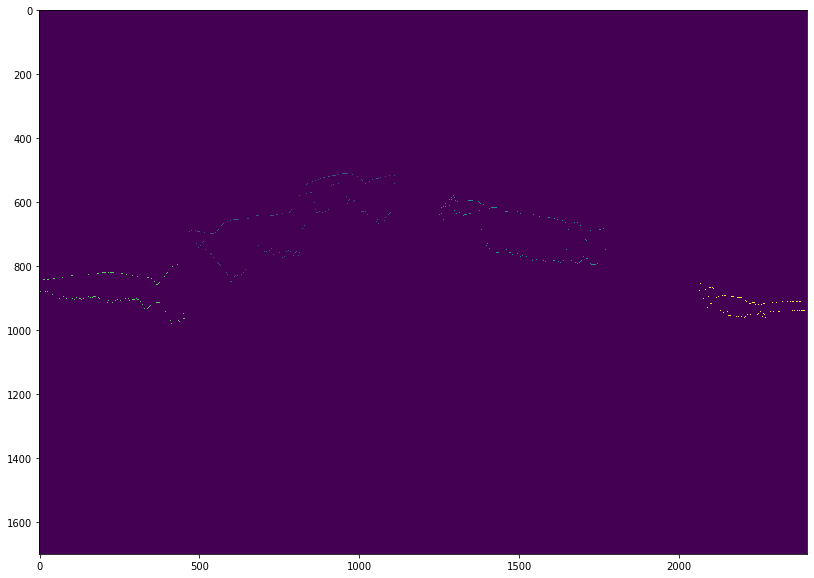

In [20]:
figure(figsize=(20,10))
imshow(edges)

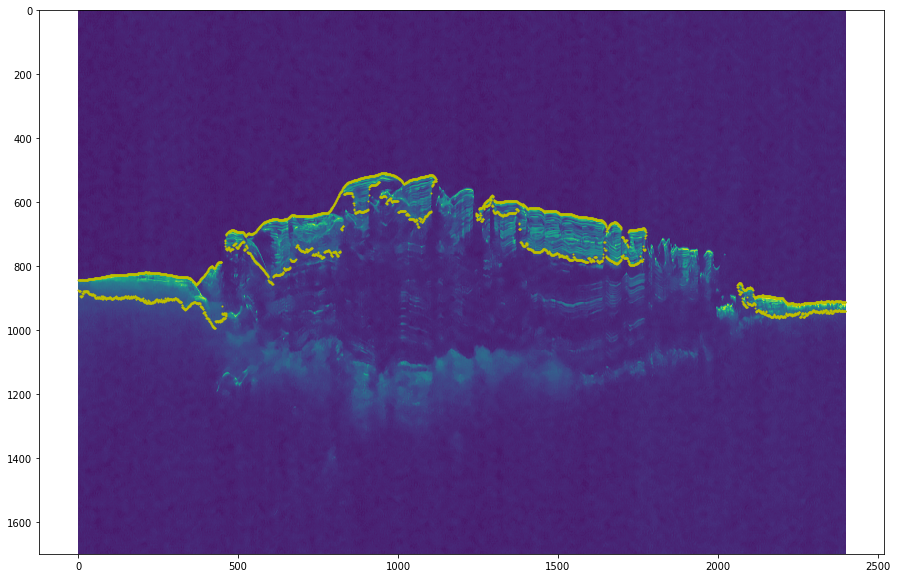

In [21]:
figure(figsize=(20,10))
imshow(imgInTiny)
plt.scatter(upperlimity,upperlimitx, c='y', s=1)
plt.scatter(lowerlimity,lowerlimitx, c='y', s=1)
#plt.savefig('tshirtPT.png', dpi=1600)

# Thickness

[   0    1    2 ... 2397 2398 2399]
[31 34 36 ... 28 28 27]


Text(0, 0.5, 'Connected Component Thickness [px]')

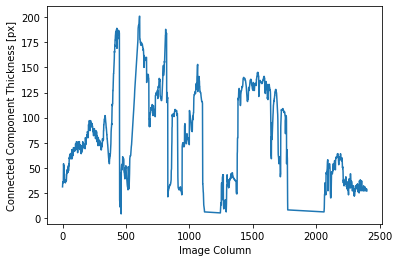

In [22]:
from ConnectedComp import Thickness

deltacolumn, delta = Thickness(upperlimity, upperlimitx, lowerlimity, lowerlimitx)
print(deltacolumn)
print(delta)

plt.plot(deltacolumn, delta)
plt.xlabel('Image Column')
plt.ylabel('Connected Component Thickness [px]')

In [23]:
deltalist = delta.tolist()
print(deltalist.index(4))

466


In [24]:
from ConnectedComp import Conversion
#This function has 3 possible argument: a thickness values array in pixel for each column of the selected connected components
#Data type specification: automatically US data (important for pixel to second conversion), specify "ITA" for italian data
#Value for dieletric const. : automatically eps = 3.15 from Putzig et al. 2009, tipical of pure water ice

deltasec, deltakm, deltam = Conversion(delta)

Thickness [sec] [1.1625e-06 1.2750e-06 1.3500e-06 ... 1.0500e-06 1.0500e-06 1.0125e-06]
Maximum thickness [microsec] 7.5375
Thickness [m]: [ 98.18121267 107.68262035 114.01689214 ...  88.67980499  88.67980499
  85.5126691 ]
Maximum thickness [m]: 636.5943144282279
Average thickness [m]: 269.92570504271316


Text(0, 0.5, 'Connected Component Thickness [m]')

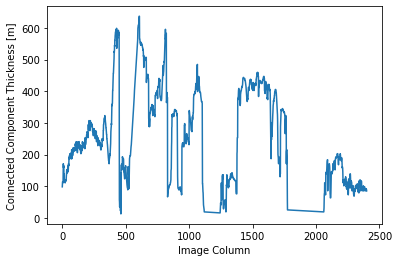

In [25]:
plt.plot(deltacolumn, deltam)
plt.xlabel('Image Column')
plt.ylabel('Connected Component Thickness [m]')